# Exploratory Data Analysis - Terrorism

## By -  Harshiv Saravanan
## GRIP @ The Sparks Foundation

# (1) Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns',200)

In [2]:
df = pd.read_csv('globalterrorism.csv',encoding='latin1')

c:\users\harsh\pycharmprojects\pythonproject2\venv\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

# (2) Selecting a Subset of the Total Features

In [4]:
data = df[['country_txt','iyear','targtype1_txt','attacktype1_txt',
         'weaptype1_txt','ransom','property','success']]

## (2.1) Drop NaN Values and show Dataframe

In [5]:
data.dropna()
data.head(5)

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
0,Dominican Republic,1970,Private Citizens & Property,Assassination,Unknown,0.0,0,1
1,Mexico,1970,Government (Diplomatic),Hostage Taking (Kidnapping),Unknown,1.0,0,1
2,Philippines,1970,Journalists & Media,Assassination,Unknown,0.0,0,1
3,Greece,1970,Government (Diplomatic),Bombing/Explosion,Explosives,0.0,1,1
4,Japan,1970,Government (Diplomatic),Facility/Infrastructure Attack,Incendiary,0.0,1,1


## (2.2) Check for any Duplicates

In [6]:
data.loc[data.duplicated()]

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
11,United States,1970,Military,Facility/Infrastructure Attack,Incendiary,0.0,1,1
13,United States,1970,Government (General),Facility/Infrastructure Attack,Incendiary,0.0,1,1
19,United States,1970,Business,Facility/Infrastructure Attack,Incendiary,0.0,1,1
22,United States,1970,Educational Institution,Bombing/Explosion,Explosives,0.0,1,1
23,United States,1970,Military,Bombing/Explosion,Explosives,0.0,0,0
...,...,...,...,...,...,...,...,...
181685,Afghanistan,2017,Business,Bombing/Explosion,Explosives,NaN,1,1
181686,Somalia,2017,Military,Armed Assault,Firearms,NaN,-9,1
181687,Syria,2017,Military,Bombing/Explosion,Explosives,NaN,1,1
181688,Philippines,2017,Private Citizens & Property,Facility/Infrastructure Attack,Incendiary,NaN,1,1


## (2.3) Drop Duplicates

In [7]:
data = data.drop_duplicates()
data.loc[data.duplicated()]

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success


## (2.4) Miscellaneous Data Cleaning

In [8]:
data['ransom'].value_counts()

 0.0    26866
 1.0      969
-9.0      881
Name: ransom, dtype: int64

In [9]:
data = data.drop(data.query('ransom == -9').index)
data.head()

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
0,Dominican Republic,1970,Private Citizens & Property,Assassination,Unknown,0.0,0,1
1,Mexico,1970,Government (Diplomatic),Hostage Taking (Kidnapping),Unknown,1.0,0,1
2,Philippines,1970,Journalists & Media,Assassination,Unknown,0.0,0,1
3,Greece,1970,Government (Diplomatic),Bombing/Explosion,Explosives,0.0,1,1
4,Japan,1970,Government (Diplomatic),Facility/Infrastructure Attack,Incendiary,0.0,1,1


In [10]:
data['ransom'].value_counts()

0.0    26866
1.0      969
Name: ransom, dtype: int64

# (3) Attack Frequency vs Years

[Text(0.5, 1.0, 'Total Attack Distribution ')]

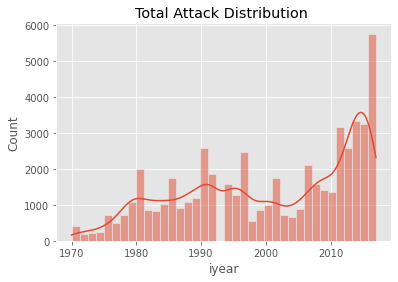

In [11]:
sns.histplot(data = data['iyear'], kde = True).set( title="Total Attack Distribution ") 

## (3.1) Successful Attack Frequency Distirbution

[Text(0.5, 1.0, 'Total Success Distribution ')]

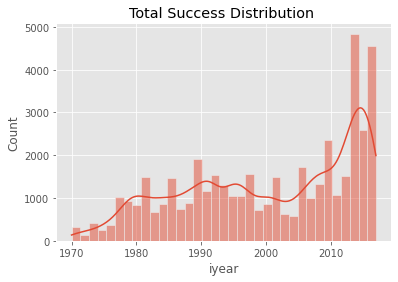

In [12]:
d = data.query('success == 1')
sns.histplot(data = d['iyear'], kde = True).set( title="Total Success Distribution ") 

In [13]:
(d['attacktype1_txt'].value_counts())

Bombing/Explosion                      14811
Armed Assault                          10993
Assassination                           5869
Hostage Taking (Kidnapping)             5156
Facility/Infrastructure Attack          4066
Unknown                                 2523
Hostage Taking (Barricade Incident)      716
Unarmed Assault                          602
Hijacking                                519
Name: attacktype1_txt, dtype: int64

In [14]:
(d['attacktype1_txt'].value_counts())*100/(data['attacktype1_txt'].value_counts())

Bombing/Explosion                      79.951417
Armed Assault                          90.693837
Assassination                          66.852717
Hostage Taking (Kidnapping)            95.516858
Facility/Infrastructure Attack         90.880644
Unknown                                85.380711
Hostage Taking (Barricade Incident)    98.895028
Unarmed Assault                        86.994220
Hijacking                              87.080537
Name: attacktype1_txt, dtype: float64

In [15]:
(d['country_txt'].value_counts())*100/(data['country_txt'].value_counts())

Afghanistan     84.618854
Albania         76.271186
Algeria         88.553114
Andorra        100.000000
Angola          94.693878
                  ...    
Yemen           77.797203
Yugoslavia      85.156250
Zaire           92.500000
Zambia          90.697674
Zimbabwe        94.186047
Name: country_txt, Length: 205, dtype: float64

## (3.2) Unsuccessful Attack Frequency Distirbution

[Text(0.5, 1.0, 'Total Failure Distribution ')]

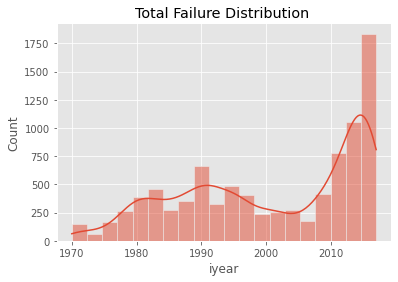

In [16]:
d = data.query('success == 0')
sns.histplot(data = d['iyear'], kde = True).set( title="Total Failure Distribution ") 

In [17]:
(d['attacktype1_txt'].value_counts())*100/(data['attacktype1_txt'].value_counts())

Armed Assault                           9.306163
Assassination                          33.147283
Bombing/Explosion                      20.048583
Facility/Infrastructure Attack          9.119356
Hijacking                              12.919463
Hostage Taking (Barricade Incident)     1.104972
Hostage Taking (Kidnapping)             4.483142
Unarmed Assault                        13.005780
Unknown                                14.619289
Name: attacktype1_txt, dtype: float64

In [18]:
(d['country_txt'].value_counts())*100/(data['country_txt'].value_counts())

Afghanistan    15.381146
Albania        23.728814
Algeria        11.446886
Andorra              NaN
Angola          5.306122
                 ...    
Yemen          22.202797
Yugoslavia     14.843750
Zaire           7.500000
Zambia          9.302326
Zimbabwe        5.813953
Name: country_txt, Length: 205, dtype: float64

# (4) Major Terrorist Target Types

## (4.1) Targets Before the Year 2000

In [19]:
d = data.query('iyear < 2000')
d['targtype1_txt'].value_counts()*100/data['targtype1_txt'].value_counts()

Abortion Related                  78.787879
Airports & Aircraft               73.275862
Business                          55.658046
Educational Institution           41.614256
Food or Water Supply              47.773279
Government (Diplomatic)           64.696017
Government (General)              47.047422
Journalists & Media               50.355691
Maritime                          59.139785
Military                          40.136173
NGO                               33.959732
Other                             15.533981
Police                            39.869919
Private Citizens & Property       40.412350
Religious Figures/Institutions    37.221728
Telecommunication                 47.433265
Terrorists/Non-State Militia      34.618474
Tourists                          59.436620
Transportation                    53.368722
Unknown                           33.111323
Utilities                         49.700599
Violent Political Party           41.368421
Name: targtype1_txt, dtype: floa

## (4.2) Targets After the Year 2000

In [20]:
d = data.query('iyear > 2000')
d['targtype1_txt'].value_counts()*100/data['targtype1_txt'].value_counts()

Abortion Related                  17.171717
Airports & Aircraft               25.478927
Business                          42.958326
Educational Institution           57.494759
Food or Water Supply              51.417004
Government (Diplomatic)           33.542977
Government (General)              50.781755
Journalists & Media               47.815041
Maritime                          39.784946
Military                          57.995810
NGO                               64.026846
Other                             84.466019
Police                            58.585366
Private Citizens & Property       56.997766
Religious Figures/Institutions    60.641140
Telecommunication                 51.129363
Terrorists/Non-State Militia      64.738956
Tourists                          37.464789
Transportation                    45.120457
Unknown                           66.032350
Utilities                         49.358426
Violent Political Party           57.473684
Name: targtype1_txt, dtype: floa

# (5) Conclusion

## Thus I have successfully Performed Exploratory Data Analytics on Global Terrorism Dataset